### Try it 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.  

In [5]:
pip install statsmodels

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 1.6 MB/s eta 0:00:0000:010:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 2.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
sunspots = sm.datasets.sunspots.load_pandas().data
air = pd.read_csv(r'C:\Users\Duy Nguyen\Downloads\UCBerkleyML-AI-TryIts\module 10\data\AirPassengers.csv')
# air = pd.read_csv('/Users/ihduynguyen/Downloads/module 10/data/AirPassengers.csv')
acc_death_us = pd.read_csv(r'C:\Users\Duy Nguyen\Downloads\UCBerkleyML-AI-TryIts\module 10\data\accidental-deaths-in-usa-monthly.csv')
# acc_death_us = pd.read_csv('/Users/ihduynguyen/Downloads/module 10/data/accidental-deaths-in-usa-monthly.csv')

In [3]:
# Assuming 'data' is your pandas DataFrame
acc_death_us.rename(columns={'Accidental deaths in USA: monthly, 1973 ? 1978': 'Accidents'}, inplace=True)

# Verify the change
print(acc_death_us.columns)


Index(['Month', 'Accidents'], dtype='object')


In [4]:
acc_death_us

,Month,Accidents
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017
...,...,...
67,1978-08,9827
68,1978-09,9110
69,1978-10,9070
70,1978-11,8633


In [70]:
air['Month'] = pd.to_datetime(air['Month'])

In [71]:
air.set_index('Month', inplace=True)

In [72]:
sunspots['YEAR'] = sunspots['YEAR'].astype(int).astype(str)
sunspots.set_index(pd.PeriodIndex(sunspots['YEAR'], freq='Y'), inplace=True)
sunspots.drop('YEAR', axis=1, inplace=True)

I decide to decompose sunspot additively because the seasonal fluctuations don't seem to be proportional to the level of the time series.

While Air Passengers, the choice of a multiplicative model was due to the observable trend in the data where both the trend and seasonal increase over time.

In [73]:
decomp_air_passengers = seasonal_decompose(air['#Passengers'], model='multiplicative', period=12)
decomp_sunspots = seasonal_decompose(sunspots['SUNACTIVITY'], model='additive', period=11)

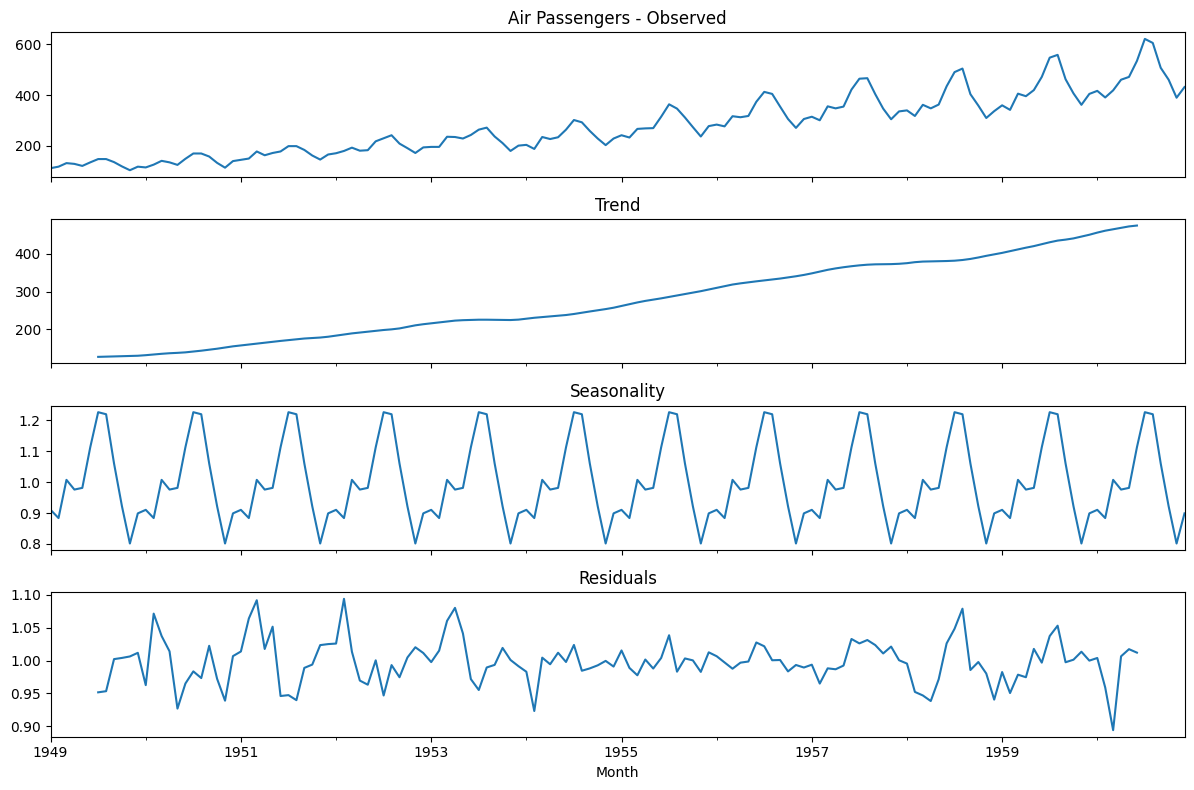

In [74]:
# Plotting the decomposed components for Air Passengers
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
decomp_air_passengers.observed.plot(ax=axes[0], title='Air Passengers - Observed')
decomp_air_passengers.trend.plot(ax=axes[1], title='Trend')
decomp_air_passengers.seasonal.plot(ax=axes[2], title='Seasonality')
decomp_air_passengers.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()

plt.show()

- Observed data has an increasing trend with regular seasonal fluctuation
- There is a clear upward trend with steady growth in number of air passenger over the years
- peaks and troughs corresponding to particular times of the year. This likely reflects increased travel during holiday seasons.
- after removing the trend and seasonality, the residuals show relatively small irregularities, indicating the multiplicative model captures the main patterns quite well.

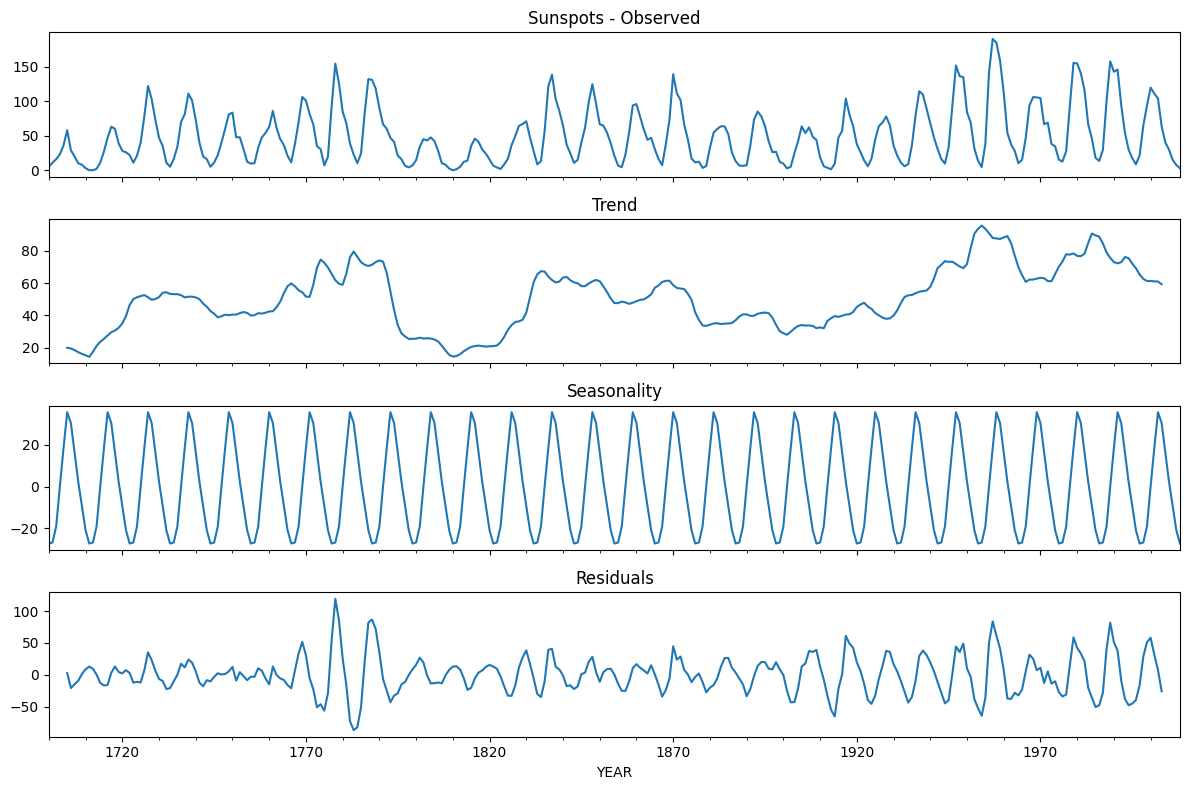

In [75]:
# Plotting the decomposed components for Sunspots
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(12,8))
decomp_sunspots.observed.plot(ax=axes[0], title='Sunspots - Observed')
decomp_sunspots.trend.plot(ax=axes[1], title='Trend')
decomp_sunspots.seasonal.plot(ax=axes[2], title='Seasonality')
decomp_sunspots.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()

plt.show()

- the observed data appears to show a cyclic patterns with varying intensity and frequency over time.
- the trend smooths out the shorter term fluctuations and highlights periods of increasing and decreasing sunspot activity, not a clear long term trends
- there seems to not be a seasonal pattern but more like a constand cycle therefore it is not a true seasonality
- the rediduals exhibit a fair amount of variability. This suggests that the additive model used for decomposition did not capture the complexity of the sunspot series. 

Overall, we can clearly see that additive model decomposition make the four graph looks very similar, rule of thumb to say that the model didn't fit well for each compositions!

### Let's organize the code into modulars

In [3]:
import sys
sys.path.append(r'C:\Users\Duy Nguyen\Downloads\UCBerkleyML-AI-TryIts\module 10') # for window
sys.path.append('/Users/ihduynguyen/Downloads/module 10')


In [7]:
from UCBerkeley_MLAI.stl_seasonal_decompose.modelling.timeseries_decomposer import TimeSeriesDecomposer
from UCBerkeley_MLAI.stl_seasonal_decompose.modelling.timeseries_forecaster import TimeSeriesForecaster


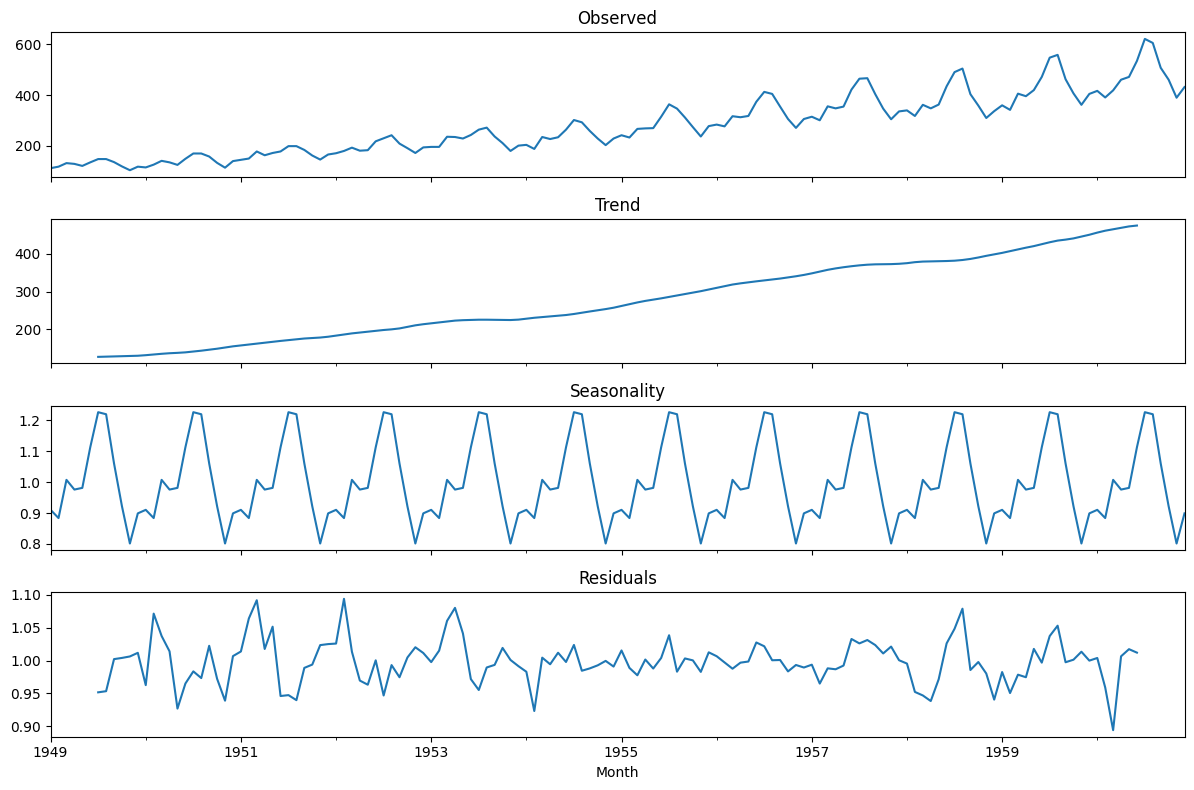

In [5]:
air_decomposer = TimeSeriesDecomposer(
    df=air,
    date_col='Month',
    data_col='#Passengers',
    freq='M',
    model='multiplicative',
    period=12
)

air_decomposer.decompose()
air_decomposer.plot_decompositions()

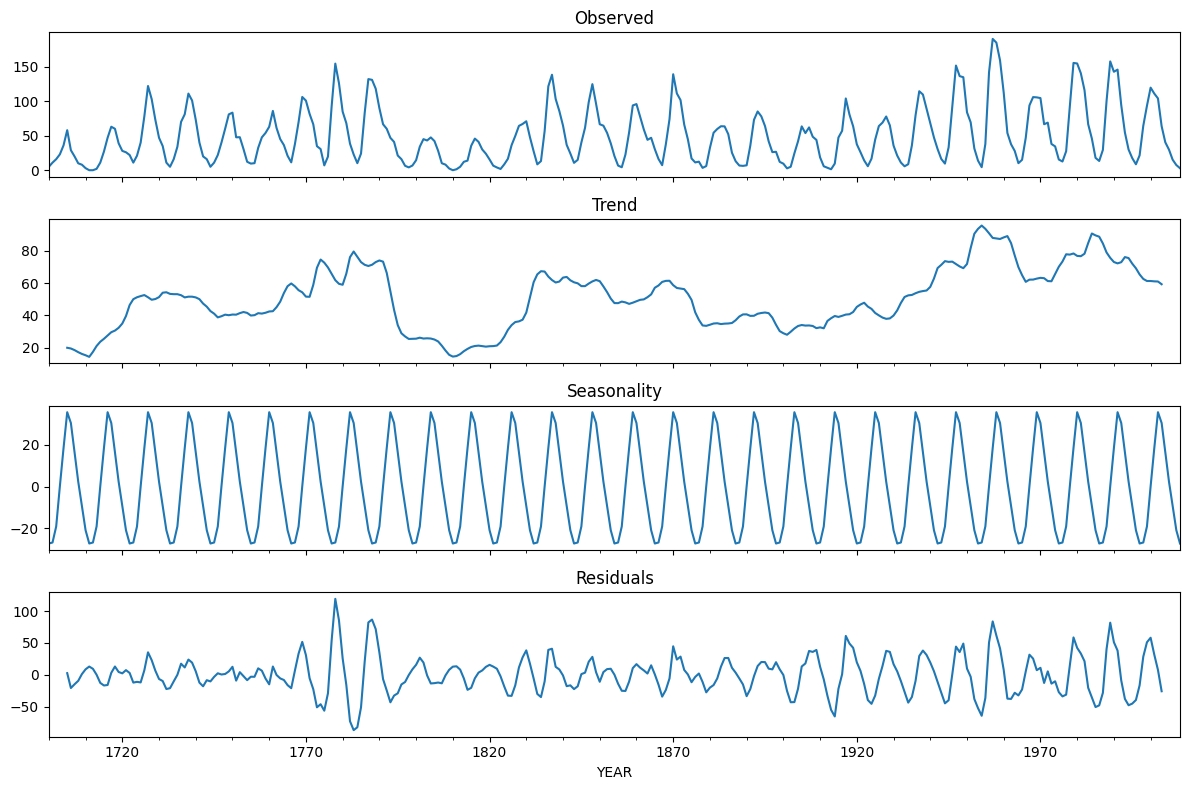

In [6]:
# Sunspots data
sunspots_decomposer = TimeSeriesDecomposer(
    df=sunspots,
    date_col='YEAR',
    data_col='SUNACTIVITY',
    freq='Y',
    model='additive',
    period=11
)
sunspots_decomposer.decompose()
sunspots_decomposer.plot_decompositions()


The module reflect the same visualization result from the manual function implementation capturing the accuracy of the architecture of the module design!